In [1]:
import pandas as pd
import numpy as np


In [3]:
# Load the data
data = pd.read_csv(r'D:\My\University\Nam2\Kì 1\HocMayThongKe\ThucHanh\KHDL\Lab1/forestfires.csv')


In [5]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


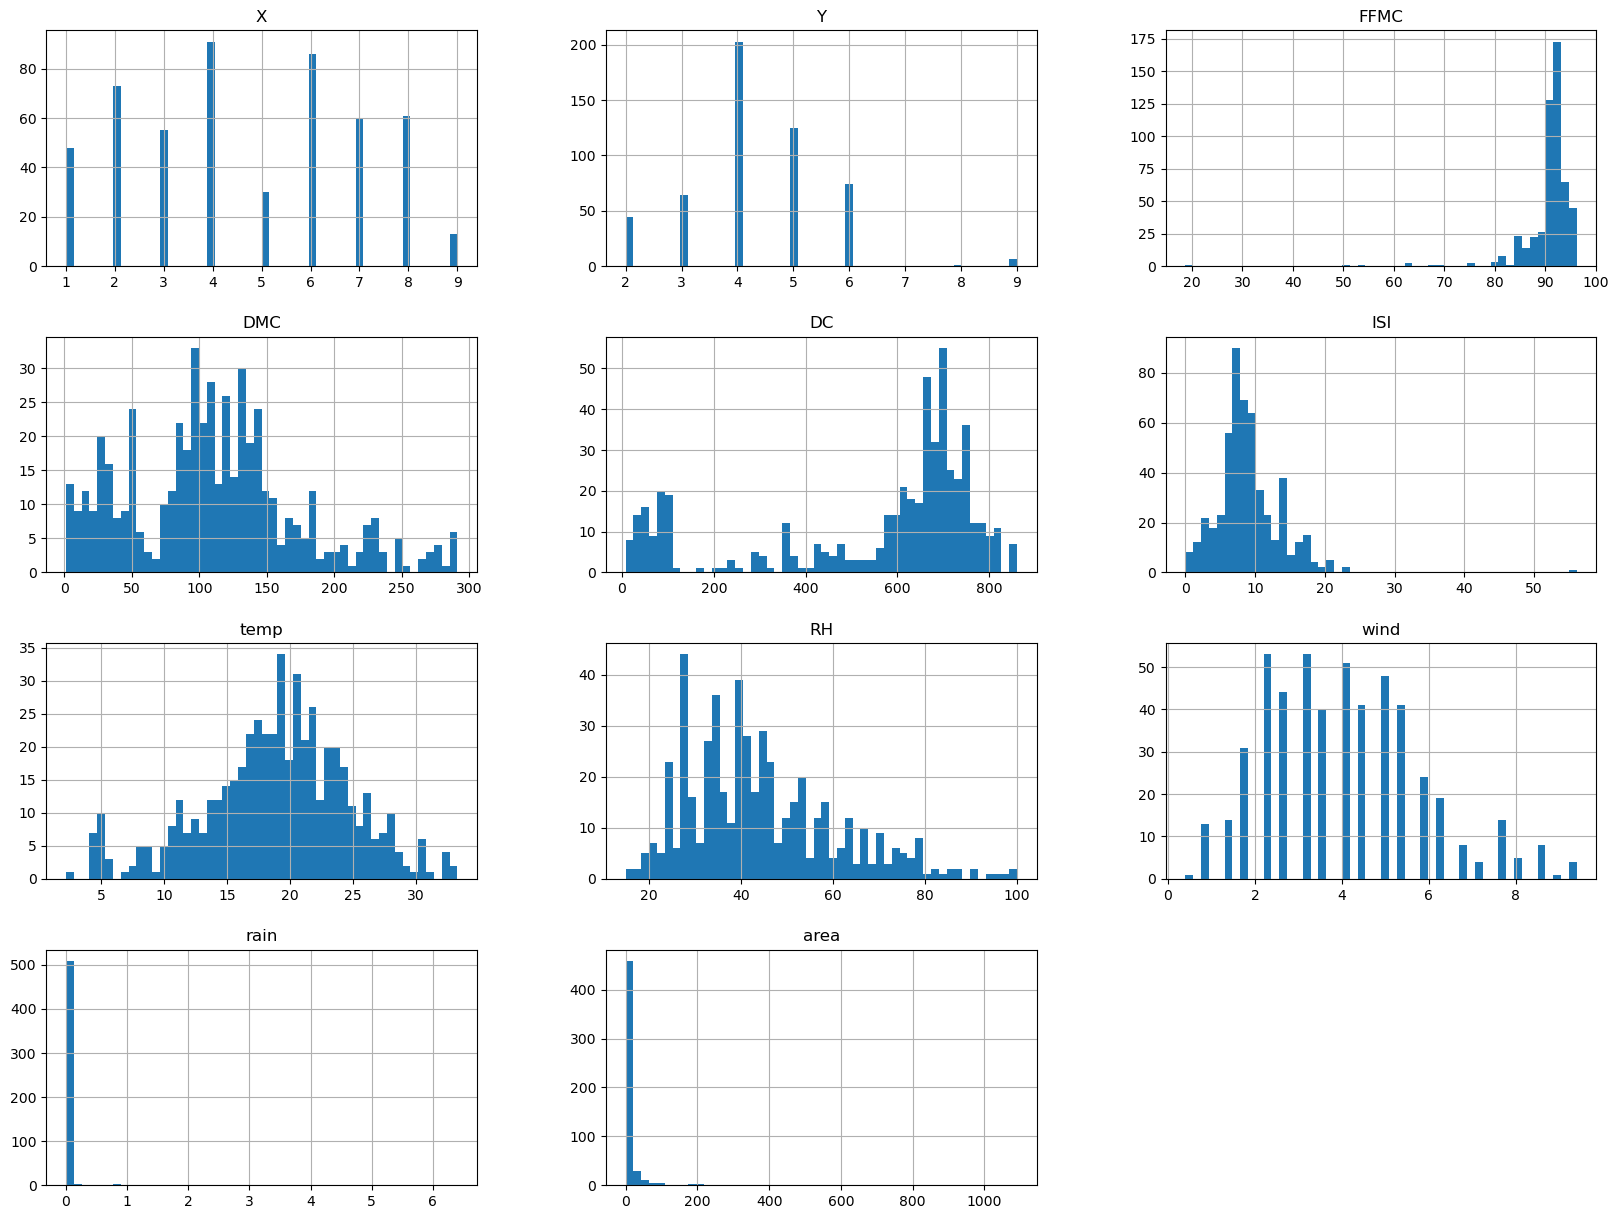

In [7]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='X', ylabel='Y'>

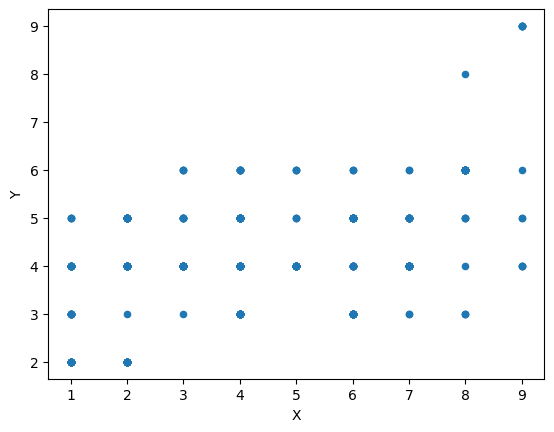

In [9]:
data.plot(kind="scatter", x="X", y="Y")

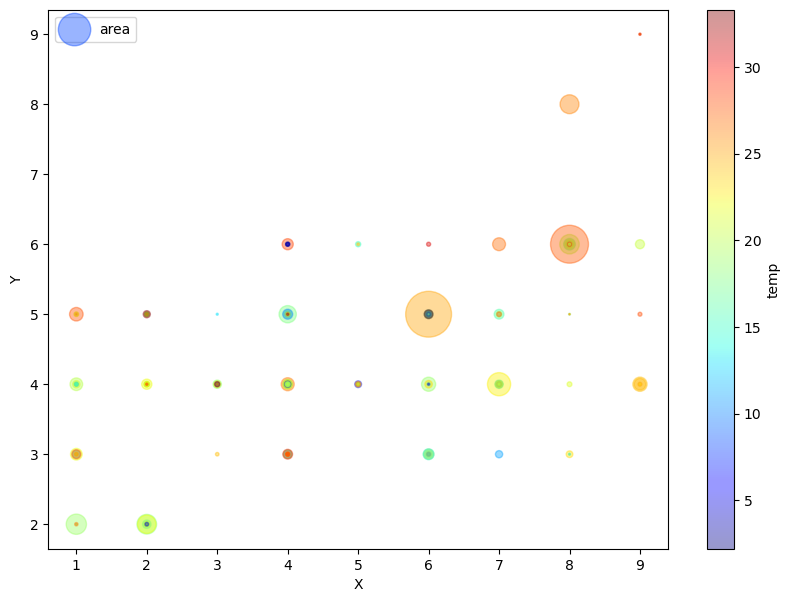

In [12]:
data.plot(kind="scatter", x="X", y="Y", alpha=0.4, s=data["area"], label="area", figsize=(10,7), c="temp", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [13]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
month_encoded = encoder.fit_transform(data["month"])
day_encoded = encoder.fit_transform(data["day"])

array([0, 5, 2, 0, 3, 3, 1, 1, 5, 2, 2, 2, 0, 1, 6, 0, 2, 1, 6, 2, 5, 1,
       3, 2, 2, 3, 0, 1, 2, 3, 0, 1, 0, 3, 1, 5, 5, 0, 2, 5, 5, 2, 5, 2,
       6, 6, 1, 1, 1, 1, 4, 3, 6, 6, 4, 4, 5, 3, 1, 0, 3, 3, 4, 3, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 1, 0, 5, 3, 3, 5, 6, 4, 4, 4, 4,
       3, 2, 2, 0, 3, 3, 1, 3, 2, 2, 3, 3, 3, 5, 5, 2, 2, 0, 4, 3, 2, 1,
       0, 0, 3, 1, 5, 5, 2, 2, 1, 4, 1, 1, 3, 5, 0, 3, 1, 0, 6, 3, 2, 1,
       3, 4, 5, 2, 3, 1, 5, 5, 1, 6, 0, 2, 6, 4, 1, 5, 5, 4, 0, 3, 2, 0,
       2, 3, 2, 6, 6, 0, 1, 4, 2, 2, 3, 4, 6, 6, 0, 4, 6, 6, 3, 1, 2, 2,
       4, 3, 6, 5, 3, 1, 3, 1, 0, 5, 3, 1, 2, 3, 0, 4, 5, 6, 5, 0, 4, 4,
       5, 1, 5, 3, 3, 6, 2, 4, 2, 5, 0, 4, 2, 2, 0, 1, 2, 2, 3, 1, 6, 1,
       3, 0, 1, 0, 6, 3, 1, 2, 3, 2, 6, 3, 5, 5, 2, 3, 2, 5, 2, 3, 6, 0,
       3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 4, 4, 4, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 4, 1, 1, 1, 1, 0, 5, 3, 6, 0, 3,
       6, 2, 2, 2, 2, 2, 0, 5, 5, 3, 3, 3, 6, 2, 1,

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
data_num = data.drop(["month", "day"], axis=1)

data_pre_process = np.append(data_num, month_encoded.reshape(-1,1), axis=1)
data_pre_process = np.append(data_pre_process, day_encoded.reshape(-1,1), axis=1)
data_pre_process.shape

(517, 13)

In [92]:
#convert to dataframe
data_pre_process = pd.DataFrame(data_pre_process, columns=data_num.columns.tolist()+["month", "day"])
data_pre_process.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day
0,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,7.0,0.0
1,7.0,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,10.0,5.0
2,7.0,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,10.0,2.0
3,8.0,6.0,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0,7.0,0.0
4,8.0,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0,7.0,3.0


In [96]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
y = data_pre_process["temp"]
X = data_pre_process.drop("temp", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [97]:
rmse

3.7664035727837546

In [98]:
model.predict(X_test)

array([ 2.7716133 , 20.21412561, 26.33031585, 19.30389153, 26.69072949,
       14.05071452, 10.58913871, 20.7846489 , 22.39677103, 15.08765879,
       22.09095771, 19.28864333, 22.33864058, 19.46714606, 15.25976512,
       16.13204908, 16.58504714, 24.37714636, 24.00153472, 22.91138629,
       12.32384078, 24.25506151, 17.18970575, 20.93953063, 18.34662226,
       27.26439566, 14.55768086, 29.6834704 , 21.92647698, 21.2409604 ,
       19.59993915, 22.74858082, 20.41561735, 18.90812124, 16.66189845,
       19.77009772, 21.85263977, 20.12937403, 21.10654057, 19.92875916,
       22.49733553, 20.4169925 , 23.54141739, 24.16250055, 26.45455656,
       19.81602454,  8.26244628, 15.56007315, 22.2908464 , 19.40424402,
       16.45106634, 24.9681952 , 25.48380401, 21.84668296, 27.07032222,
       17.13934668, 20.75089892, 18.2263811 , 18.46592355, 14.69644518,
       25.23040442, 26.51599568, 21.6954944 , 20.79691109, 20.87229942,
       23.5346399 , 19.2878819 , 21.77201495, 21.85076249, 10.69

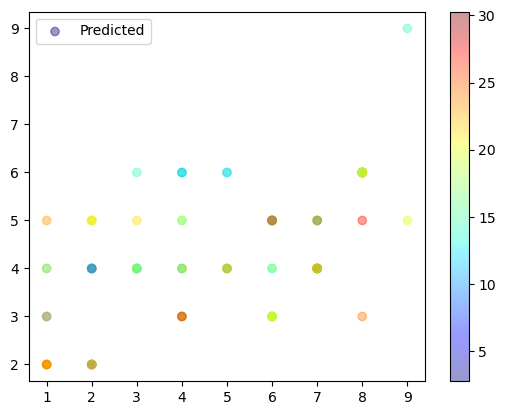

In [101]:

y_pred = model.predict(X_test)
plt.scatter(X_test["X"], X_test["Y"],alpha=0.4, c=y_pred, cmap=plt.get_cmap("jet"), label="Predicted")
plt.colorbar()
plt.legend()
#create new scatter plot for actual data


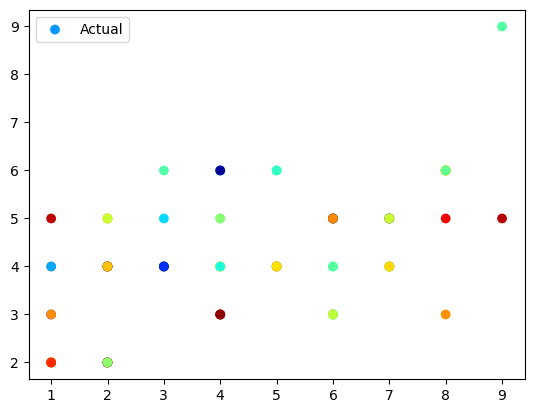

In [102]:
plt.scatter(X_test["X"], X_test["Y"], c=y_test, cmap=plt.get_cmap("jet"), label="Actual")
plt.legend()